**Chi Square**

In [ ]:
import pandas as pd

Loading the csv


In [ ]:
data = pd.read_csv('drive/MyDrive/dataset/anime.csv')
data = data.drop(['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1','MAL_ID'], axis=1)
mask = data['Score'] == 'Unknown'
data = data[~mask]
data.head()

,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,...,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",...,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",...,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394


In [ ]:
data.shape

(12421, 24)

In [ ]:
# features and target
df = data.drop('Score',axis=1)
y = data['Score']


In [ ]:
# Filter null values
for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

# Label encoding
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
  le=LabelEncoder();
  df[col] = le.fit_transform(df[col])
df.head()


,Name,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1963,28,971,3550,5,86,823,87,473,99,...,3,2056,33,9086,1518,3547,7660,2904,2938,6841
1,1965,742,973,3552,0,0,8676,157,2703,199,...,3,1153,390,8606,792,2117,7304,1385,720,6201
2,11281,1322,5253,4994,5,86,135,87,3322,108,...,2,1953,162,8924,1397,3294,7505,2824,2688,6725
3,11825,1243,5530,1339,5,86,4465,138,2876,99,...,2,1823,1056,7665,514,2150,6105,2125,2007,5731
4,1344,1946,519,7188,5,128,9101,39,2888,207,...,1,2739,2988,4891,18,636,3668,741,924,2595


In [ ]:
# Standard Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data.shape

(12421, 23)

<ipython-input-67-dc3022c1a6a7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


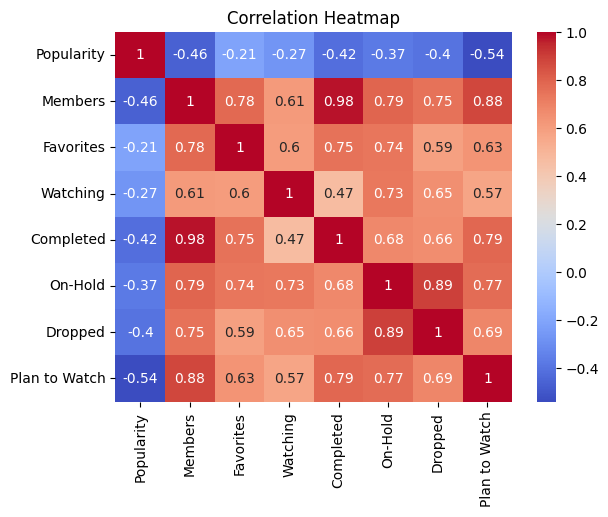

In [ ]:
# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# features and target


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(df,y)

In [ ]:
chi_scores

(array([1.30273147e+06, 5.63793244e+05, 5.40701719e+05, 1.20329002e+06,
        1.35195797e+03, 5.47210695e+04, 1.25209439e+06, 9.76648486e+03,
        4.03128984e+05, 2.34897881e+04, 1.84964512e+05, 1.71069256e+03,
        2.17428353e+04, 6.39869225e+02, 1.21318718e+07, 9.54483489e+06,
        1.40222548e+07, 4.48515074e+06, 6.45492784e+06, 1.35249373e+07,
        5.18154704e+06, 3.33958389e+06, 1.19287819e+07]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.86586360e-073, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.86922811e-124,
        0.00000000e+000, 7.98394552e-004, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

<Axes: >

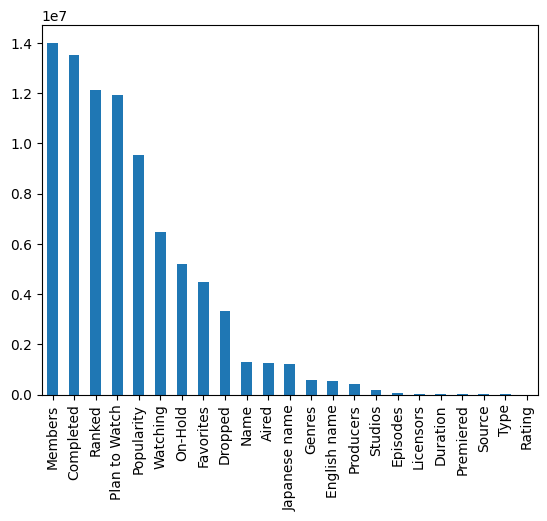

In [ ]:
# higher chi value = more important
chi_values = pd.Series(chi_scores[0], index = df.columns)
chi_values.sort_values(ascending = False , inplace = True)
chi_values.plot.bar()

<Axes: >

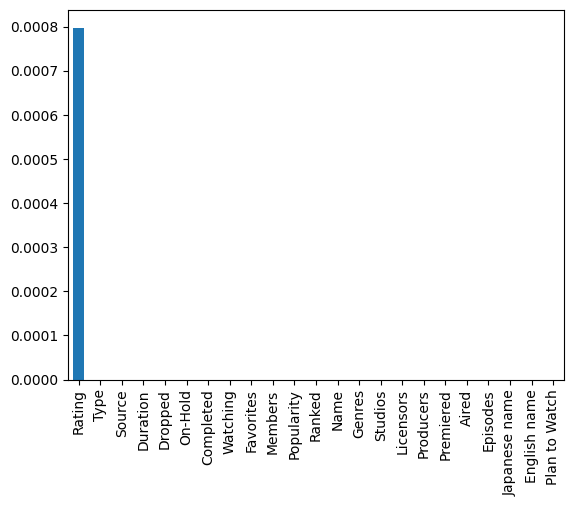

In [ ]:
# higher p values = less important
p_values = pd.Series(chi_scores[1], index = df.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values.plot.bar()

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(chi2, k=8)
X_train_chi2 = chi2_selector.fit_transform(x_train, y_train)

In [ ]:
selected_feature_indices = chi2_selector.get_support(indices=True)
X_test_chi2 = x_test.iloc[:, selected_feature_indices]

In [ ]:
X_train_chi2

array([[3840, 5520, 1881, ..., 1121,   80,  903],
       [7387, 3607, 4075, ..., 3169,  287, 1723],
       [6236, 6445, 1116, ...,  271,   39,  856],
       ...,
       [4672, 2343, 5806, ..., 4689,  324, 3666],
       [1857, 1380, 7196, ..., 5804, 1251, 5186],
       [ 354,  554, 8375, ..., 6974, 2089, 6180]])

In [ ]:
# Train (Logistic Regression)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train_chi2, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test_chi2)
score_comparison = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print(model.score(X_train_chi2,y_train))
print(model.score(X_test_chi2,y_test))
test_score = model.score(X_test_chi2,y_test)

0.9817076303051827
0.8907652531567519


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


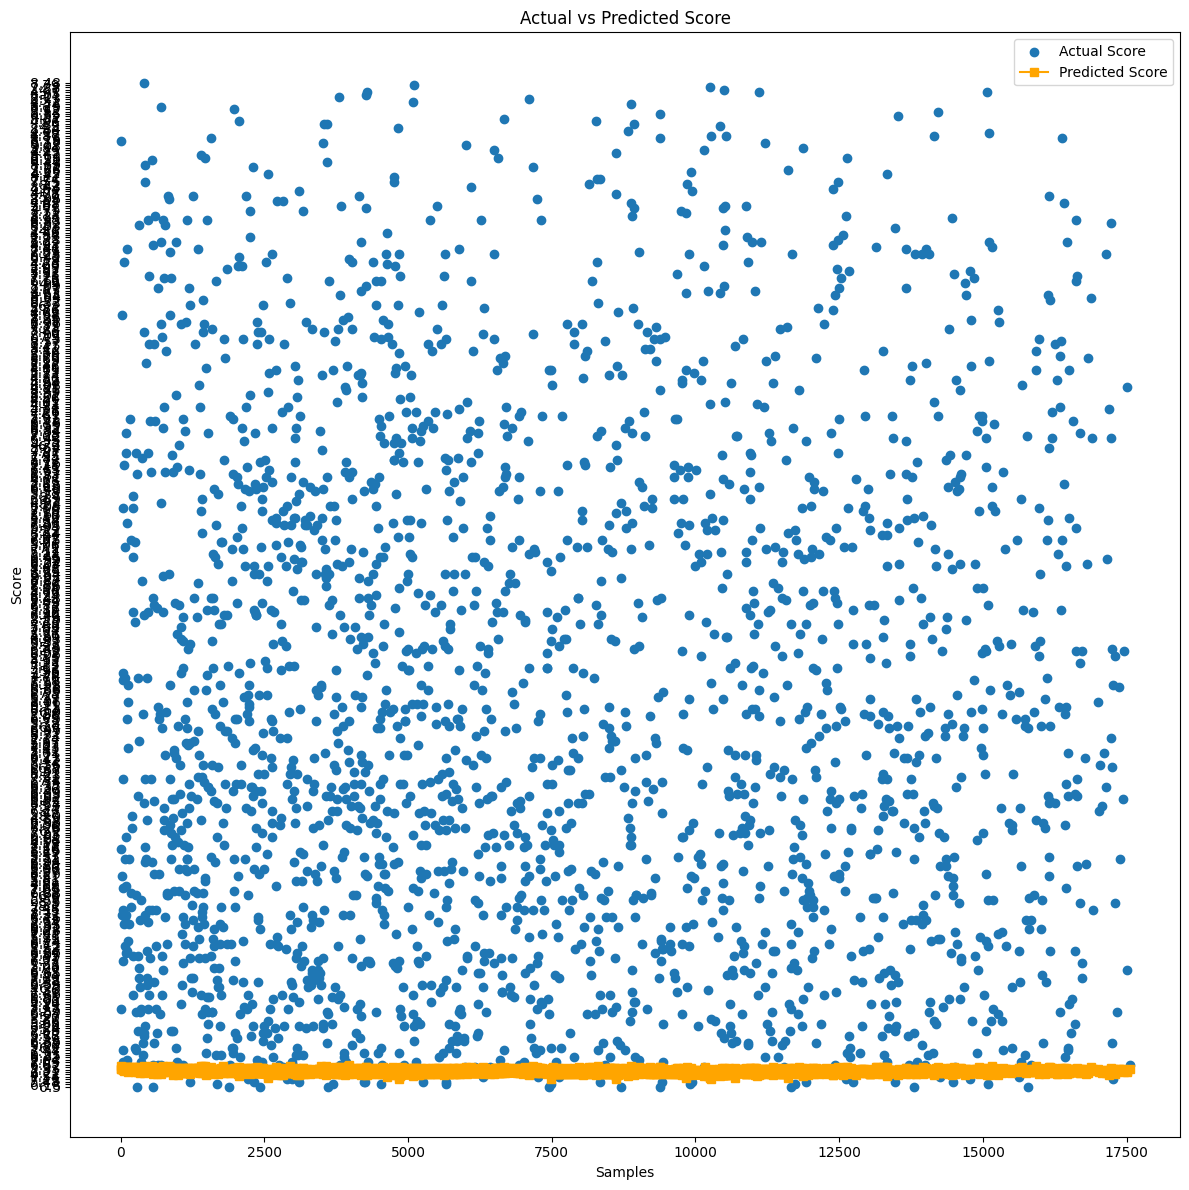

In [ ]:
plt.figure(figsize = (12,12))
plt.title("Actual vs Predicted Score")
plt.scatter(score_comparison.index, score_comparison['Actual Score'],label = "Actual Score", marker = 'o')
plt.plot(score_comparison.index, score_comparison["Predicted Score"], label = "Predicted Score", linestyle = '-', marker = 's', color="orange")
plt.xlabel("Samples")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()